#  Image 파일 다루기
## 1. prillow 이미지 정보 추출
### 1-1. 패키지 설치

In [4]:
pip install pillow opencv-python matplotlib

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### 1-2. 이미지 생성 및 데이터 전처리

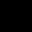

In [9]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8) # 배열 형태의 이미지 데이터,uinsigned 8bit integer 입력
image = Image.fromarray(data, 'RGB') 
image # 32x32 이미지 출력

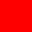

In [10]:
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image # 32x32 이미지 출력

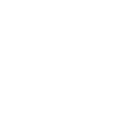

In [32]:
data_white = np.zeros([128, 128, 3], dtype=np.uint8) # 배열 형태의 이미지 데이터,uinsigned 8bit integer
data_white[:, :] = [255, 255, 255]
image = Image.fromarray(data_white, 'RGB')
image

In [37]:
from PIL import Image
import os

# 연습용 파일 경로
image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice.png'

# 이미지 열기
img = Image.open(image_path)
img

# width와 height 출력
print(img.width)
print(img.height)

# JPG 파일 형식으로 저장해보기
new_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/jpg_pillow_practice.jpg'
img = img.convert('RGB')
img.save(new_image_path)

620
465


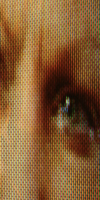

In [38]:
# .resize()를 이용한 이미지 크기 변경 및 저장
resized_image = img.resize((100,200))

resized_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_resized.png'
resized_image.save(resized_image_path)
resized_image

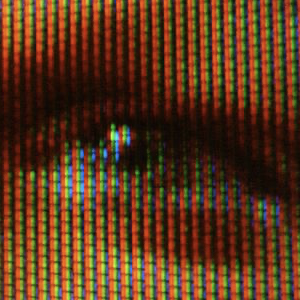

In [39]:
# .crop()을 이용한 잘라내기 및 저장
box = (300, 100, 600, 400) # 좌표
region = img.crop(box)

cropped_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_cropped.png'
region.save(cropped_image_path)
region

## 1-3. 데이터 전처리 작업 :  CIFAR-100 Dataset 

In [19]:
import os
import pickle
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/' # 파일 경로 설정
train_file_path = os.path.join(dir_path, 'train') # 경로 내 train  지정

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
print(train)

<class 'dict'>
{b'filenames': [b'bos_taurus_s_000507.png', b'stegosaurus_s_000125.png', b'mcintosh_s_000643.png', b'altar_boy_s_001435.png', b'cichlid_s_000031.png', b'phone_s_002161.png', b'car_train_s_000043.png', b'beaker_s_000604.png', b'fog_s_000397.png', b'rogue_elephant_s_000421.png', b'computer_keyboard_s_000757.png', b'willow_tree_s_000645.png', b'sunflower_s_000549.png', b'palace_s_000759.png', b'adriatic_s_001782.png', b'computer_keyboard_s_001277.png', b'bike_s_000682.png', b'wolf_pup_s_001323.png', b'squirrel_s_002467.png', b'sea_s_000678.png', b'shrew_s_002233.png', b'pine_tree_s_000087.png', b'rose_s_000373.png', b'surveillance_system_s_000769.png', b'pine_s_001533.png', b'table_s_000897.png', b'opossum_s_001237.png', b'quercus_alba_s_000257.png', b'leopard_s_000414.png', b'possum_s_002195.png', b'bike_s_000127.png', b'balmoral_castle_s_000361.png', b'acer_saccharinum_s_000646.png', b'lapin_s_000916.png', b'chimp_s_001419.png', b'clock_s_002291.png', b'streetcar_s_000663

In [20]:
train.keys() # dictionary 객체에 따른 키 값 확인

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [43]:
type(train[b'filenames']) # 파일명 객체 확인

list

In [44]:
train[b'filenames'][0:5] # 파일명

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [45]:
train[b'data'][0:5] # 픽셀 값

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [46]:
train[b'data'][0].shape # 3채널x1024(32x32)

(3072,)

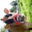

In [48]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order 인자 F값 부여
image = Image.fromarray(image_data)    # Numpy 배열 Image객체 전환
image    

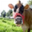

In [49]:
# 축 변경 작업
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [50]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

100%|██████████| 50000/50000 [00:18<00:00, 2763.50it/s]


## 2. OpenCV 이미지 정보 추출
### 2-1. 이미지 내 특정 색상 추출 : 마스크 생성

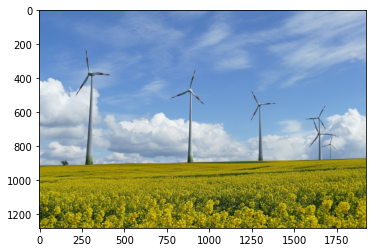

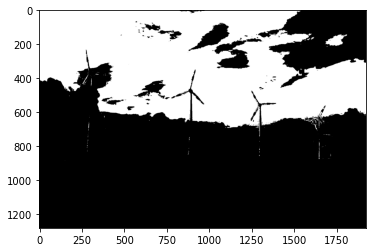

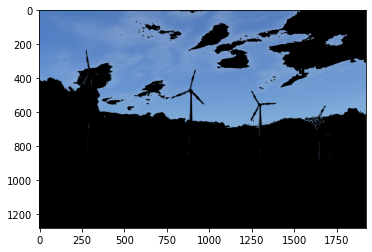

In [1]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path) # impread 이미지 로딩 및 반환

# Convert BGR to HSV(컬러스페이스 변환)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

### 2-2. 이미지 내 특정 색상 추출 : 히스토그램(RGB)

In [3]:
pip install opencv-python matplotlib

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

In [11]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

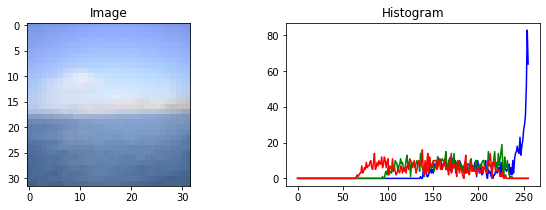

In [12]:
draw_color_histogram_from_image('adriatic_s_001807.png')

### 2-3. 히스토그램 및 유사도에 따른 이미지 선별

In [13]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [21]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [22]:
def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db

In [23]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [02:16<00:00, 365.80it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [24]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [25]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: 
유효하지 않은 이미지 파일명입니다.


In [26]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.
    # [[YOUR CODE]]

    return results

In [27]:
result = search(histogram_db, target_histogram)
result

{}

In [29]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)

In [30]:
show_result(result)

<Figure size 720x216 with 0 Axes>

In [32]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)

이미지 파일명을 입력하세요: adriatic_s_001807.png


<Figure size 720x216 with 0 Axes>